In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/salary-prediction-data/salary_prediction_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Load Dataset
df = pd.read_csv('/kaggle/input/salary-prediction-data/salary_prediction_data.csv')

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
print("✔️ Columns after clean-up:", df.columns)

# Drop rows with missing salary
df = df.dropna(subset=['salary'])

# Select features and target
X = df[['age', 'gender', 'education', 'job_title', 'experience']]
y = df['salary']

# Preprocessing
categorical_features = ['gender', 'education', 'job_title']
numerical_features = ['age', 'experience']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# Pipeline
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)
print("✅ Model training complete. R² score:", model.score(X_test, y_test))

# Save model
joblib.dump(model, 'salary_model.joblib')
print("🧠 Model saved as 'salary_model.joblib'")


✔️ Columns after clean-up: Index(['education', 'experience', 'location', 'job_title', 'age', 'gender',
       'salary'],
      dtype='object')
✅ Model training complete. R² score: 0.8254112121466748
🧠 Model saved as 'salary_model.joblib'


In [3]:
import pandas as pd
import joblib
from ipywidgets import interact, widgets
import warnings

warnings.filterwarnings('ignore')  # Optional: hide warnings

# Load model and dataset
df = pd.read_csv('/kaggle/input/salary-prediction-data/salary_prediction_data.csv')
df.columns = df.columns.str.lower().str.replace(" ", "_")
model = joblib.load("salary_model.joblib")

# Create input options
gender_options = df['gender'].dropna().unique().tolist()
education_options = df['education'].dropna().unique().tolist()
job_title_options = df['job_title'].dropna().unique().tolist()

# Prediction function
def predict_salary(age, gender, education, job_title, experience):
    input_data = pd.DataFrame([{
        'age': age,
        'gender': gender,
        'education': education,
        'job_title': job_title,
        'experience': experience
    }])
    predicted = model.predict(input_data)[0]
    print(f"💰 Predicted Annual Salary: ₹{predicted:,.0f}")
    return None  # Prevent showing function object

# UI using ipywidgets
interact(
    predict_salary,
    age=widgets.IntSlider(min=18, max=65, step=1, value=30, description="Age"),
    gender=widgets.Dropdown(options=gender_options, description="Gender"),
    education=widgets.Dropdown(options=education_options, description="Education"),
    job_title=widgets.Dropdown(options=job_title_options, description="Job Title"),
    experience=widgets.IntSlider(min=0, max=40, step=1, value=5, description="Experience")
)


interactive(children=(IntSlider(value=30, description='Age', max=65, min=18), Dropdown(description='Gender', o…

<function __main__.predict_salary(age, gender, education, job_title, experience)>

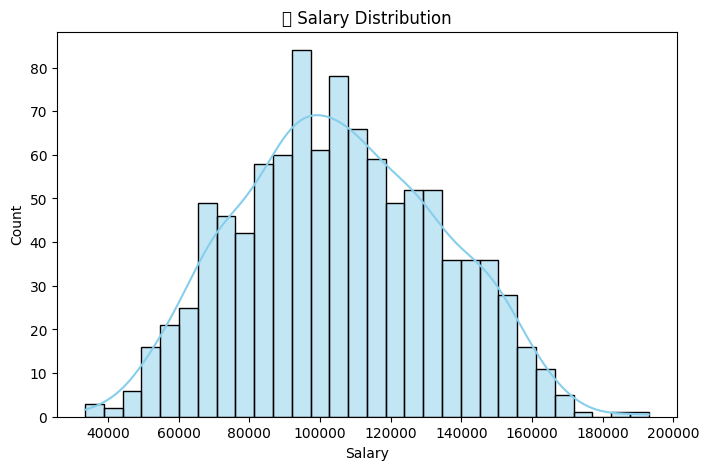

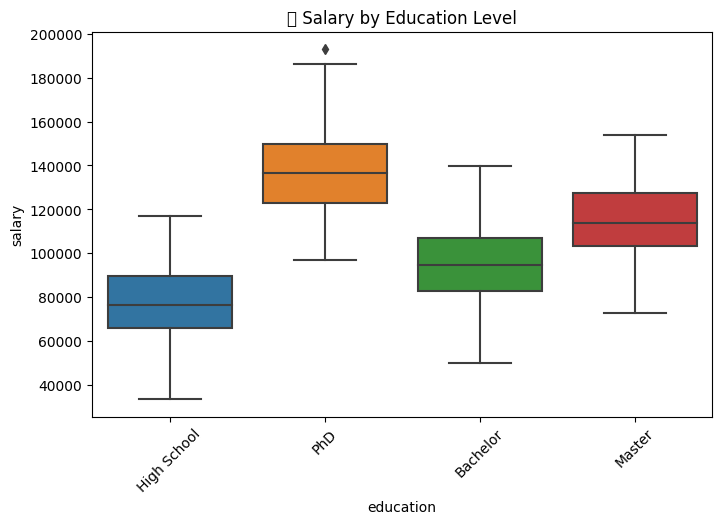

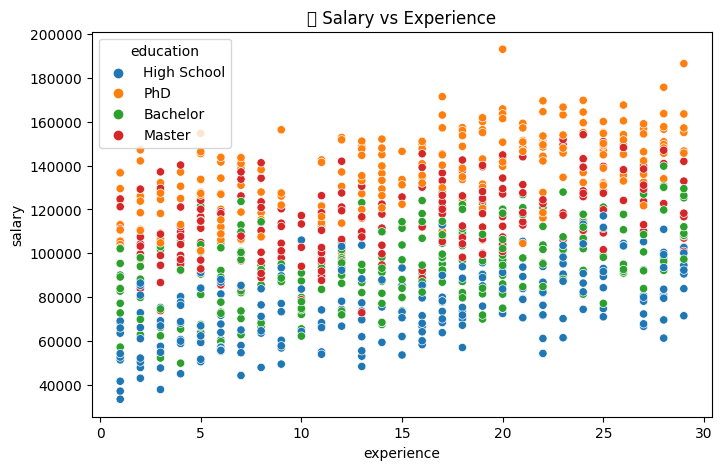

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎯 Salary Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['salary'], kde=True, bins=30, color='skyblue')
plt.title("📊 Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

# 📚 Salary vs Education
plt.figure(figsize=(8,5))
sns.boxplot(x='education', y='salary', data=df)
plt.title("🧾 Salary by Education Level")
plt.xticks(rotation=45)
plt.show()

# 🧠 Salary vs Experience
plt.figure(figsize=(8,5))
sns.scatterplot(x='experience', y='salary', data=df, hue='education')
plt.title("🧠 Salary vs Experience")
plt.show()
